In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


***Installing Required Packages***

In [3]:
%cd /content
!git clone --quiet https://github.com/tensorflow/models.git

!apt-get install -qq protobuf-compiler python-pil python-lxml python-tk

!pip install -q Cython contextlib2 pillow lxml matplotlib

!pip install -q pycocotools
!pip install -q tf_slim

%cd /content/models/research
!protoc object_detection/protos/*.proto --python_out=.

import os
import sys
os.environ['PYTHONPATH'] += ':/content/models/research/:/content/models/research/slim/'
sys.path.append("/content/models/research/slim/")

!python object_detection/builders/model_builder_test.py

/content
Selecting previously unselected package python-bs4.
(Reading database ... 144328 files and directories currently installed.)
Preparing to unpack .../0-python-bs4_4.6.0-1_all.deb ...
Unpacking python-bs4 (4.6.0-1) ...
Selecting previously unselected package python-pkg-resources.
Preparing to unpack .../1-python-pkg-resources_39.0.1-2_all.deb ...
Unpacking python-pkg-resources (39.0.1-2) ...
Selecting previously unselected package python-chardet.
Preparing to unpack .../2-python-chardet_3.0.4-1_all.deb ...
Unpacking python-chardet (3.0.4-1) ...
Selecting previously unselected package python-six.
Preparing to unpack .../3-python-six_1.11.0-2_all.deb ...
Unpacking python-six (1.11.0-2) ...
Selecting previously unselected package python-webencodings.
Preparing to unpack .../4-python-webencodings_0.5-2_all.deb ...
Unpacking python-webencodings (0.5-2) ...
Selecting previously unselected package python-html5lib.
Preparing to unpack .../5-python-html5lib_0.999999999-1_all.deb ...
Unpa

In [4]:
%cd /content/drive/My Drive/Dataset/training_class/preprocessing/

/content/drive/My Drive/Dataset/training_class/preprocessing


In [ ]:
!python xml_to_csv.py -i '/content/drive/My Drive/Dataset/training_class/images/train' -o '/content/drive/My Drive/Dataset/training_class/annotations/train_labels.csv'

!python xml_to_csv.py -i '/content/drive/My Drive/Dataset/training_class/images/test' -o '/content/drive/My Drive/Dataset/training_class/annotations/test_labels.csv'

Successfully converted xml to csv.
Successfully converted xml to csv.


In [ ]:
!python generate_tfrecord.py --label=mcd --csv_input='/content/drive/My Drive/Dataset/training_class/annotations/train_labels.csv' --output_path='/content/drive/My Drive/Dataset/training_class/annotations/train.record' --img_path='/content/drive/My Drive/Dataset/training_class/images/train'

!python generate_tfrecord.py --label=mcd --csv_input='/content/drive/My Drive/Dataset/training_class/annotations/test_labels.csv' --output_path='/content/drive/My Drive/Dataset/training_class/annotations/test.record' --img_path='/content/drive/My Drive/Dataset/training_class/images/test'

2020-06-25 14:37:50.604011: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Successfully created the TFRecords: /content/drive/My Drive/Dataset/training_class/annotations/train.record
2020-06-25 14:39:25.488935: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Successfully created the TFRecords: /content/drive/My Drive/Dataset/training_class/annotations/test.record


In [5]:
%cd '/content/drive/My Drive/Dataset/training_class/pre-trained-models'

import six.moves.urllib as urllib
import sys
import tarfile
import zipfile

MODEL_NAME = 'ssd_inception_v2_coco_2017_11_17'
MODEL_FILE = MODEL_NAME + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'


opener = urllib.request.URLopener()
opener.retrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)
tar_file = tarfile.open(MODEL_FILE)
for file in tar_file.getmembers():
    file_name = os.path.basename(file.name)
    # if 'frozen_inference_graph.pb' in file_name:
    tar_file.extract(file, os.getcwd())

/content/drive/My Drive/Dataset/training_class/pre-trained-models


In [11]:
%cd '/content/drive/My Drive/Dataset/training_class'

!python train.py --logtostderr --train_dir=training --pipeline_config_path=training/ssd_inception_v2_coco.config

Streaming output truncated to the last 5000 lines.
INFO:tensorflow:global step 4821: loss = 2.1397 (0.572 sec/step)
I0629 14:40:12.100402 140574717953920 learning.py:512] global step 4821: loss = 2.1397 (0.572 sec/step)
INFO:tensorflow:global step 4822: loss = 2.2753 (0.615 sec/step)
I0629 14:40:12.717507 140574717953920 learning.py:512] global step 4822: loss = 2.2753 (0.615 sec/step)
INFO:tensorflow:global step 4823: loss = 2.1022 (0.544 sec/step)
I0629 14:40:13.263304 140574717953920 learning.py:512] global step 4823: loss = 2.1022 (0.544 sec/step)
INFO:tensorflow:global step 4824: loss = 1.8530 (0.581 sec/step)
I0629 14:40:13.846277 140574717953920 learning.py:512] global step 4824: loss = 1.8530 (0.581 sec/step)
INFO:tensorflow:global step 4825: loss = 1.8953 (0.597 sec/step)
I0629 14:40:14.445590 140574717953920 learning.py:512] global step 4825: loss = 1.8953 (0.597 sec/step)
INFO:tensorflow:global step 4826: loss = 1.9541 (0.536 sec/step)
I0629 14:40:14.983210 140574717953920 l

In [12]:
!python export_inference_graph.py --input_type image_tensor --pipeline_config_path '/content/drive/My Drive/Dataset/training_class/training/ssd_inception_v2_coco.config' --trained_checkpoint_prefix '/content/drive/My Drive/Dataset/training_class/training/model.ckpt-6259' --output_directory trained-inference-graphs/output_inference_graph_v1

Instructions for updating:
Please use `layer.__call__` method instead.
W0629 15:04:02.039230 140466033084288 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tf_slim/layers/layers.py:2802: Layer.apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method instead.
INFO:tensorflow:depth of additional conv before box predictor: 0
I0629 15:04:04.551994 140466033084288 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0629 15:04:04.595985 140466033084288 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0629 15:04:04.636463 140466033084288 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv befo

In [13]:
%cd /content/models/research/

/content/models/research


In [21]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
import cv2

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

**Models can bee found here: https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/detection_model_zoo.md**

In [22]:
# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_FROZEN_GRAPH = '/content/drive/My Drive/Dataset/training_class/trained-inference-graphs/output_inference_graph_v1/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = r'/content/drive/My Drive/Dataset/training_class/annotations/label_map.pbtxt'

In [23]:
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

In [24]:
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

In [25]:
def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
        (im_height, im_width, 3)).astype(np.uint8)

In [35]:
PATH_TO_TEST_IMAGES_DIR = '/content/drive/My Drive/Dataset/training_class/images/test'

TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, '{}.jpg'.format(i)) for i in range(190,200) ]
print("TEST_IMAGE_PATHS:", TEST_IMAGE_PATHS)
IMAGE_SIZE = (12, 8)

TEST_IMAGE_PATHS: ['/content/drive/My Drive/Dataset/training_class/images/test/190.jpg', '/content/drive/My Drive/Dataset/training_class/images/test/191.jpg', '/content/drive/My Drive/Dataset/training_class/images/test/192.jpg', '/content/drive/My Drive/Dataset/training_class/images/test/193.jpg', '/content/drive/My Drive/Dataset/training_class/images/test/194.jpg', '/content/drive/My Drive/Dataset/training_class/images/test/195.jpg', '/content/drive/My Drive/Dataset/training_class/images/test/196.jpg', '/content/drive/My Drive/Dataset/training_class/images/test/197.jpg', '/content/drive/My Drive/Dataset/training_class/images/test/198.jpg', '/content/drive/My Drive/Dataset/training_class/images/test/199.jpg']


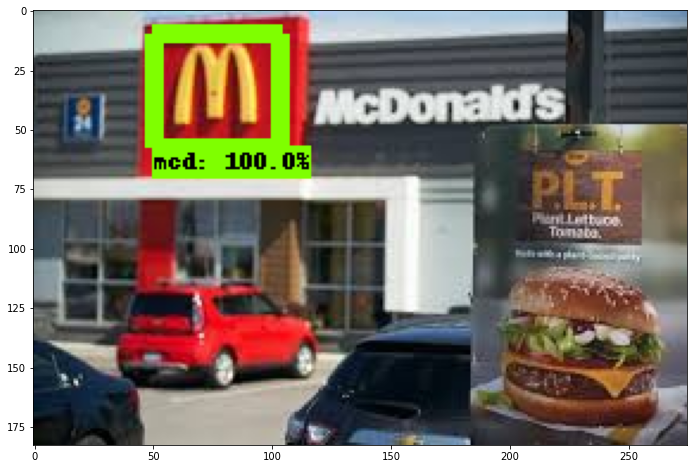

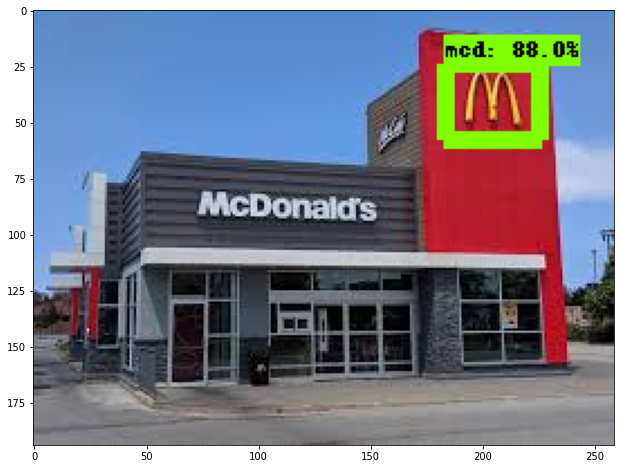

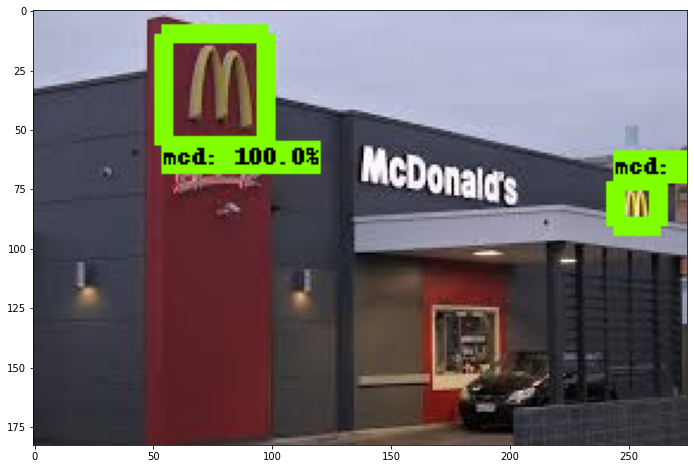

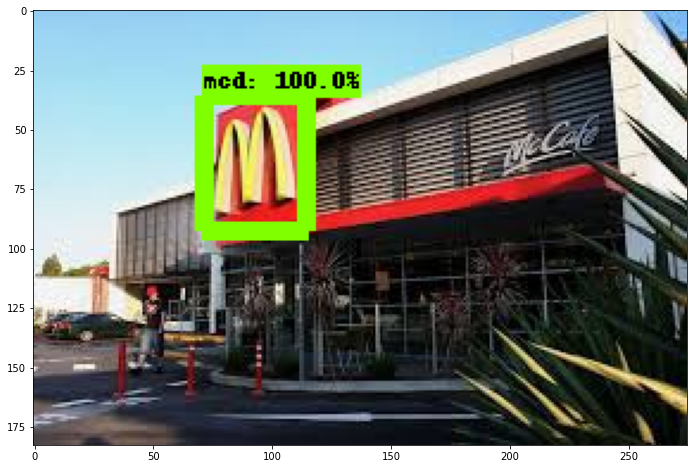

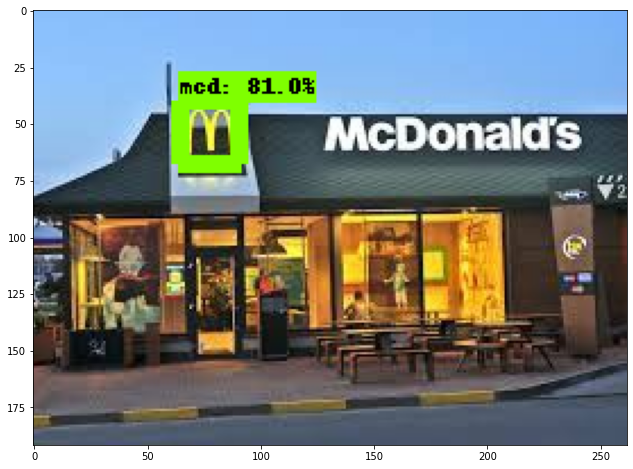

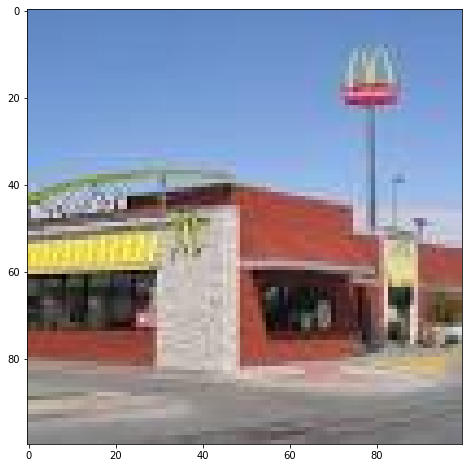

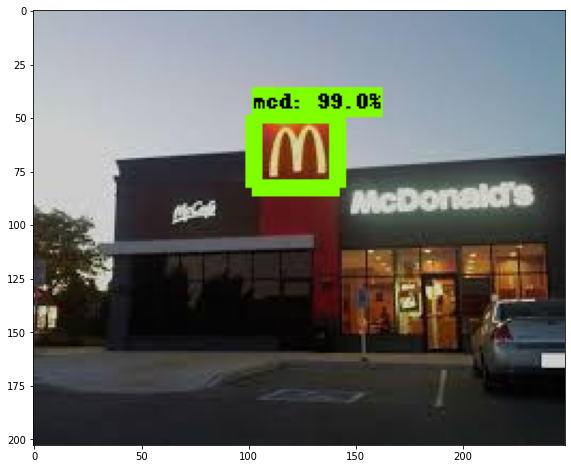

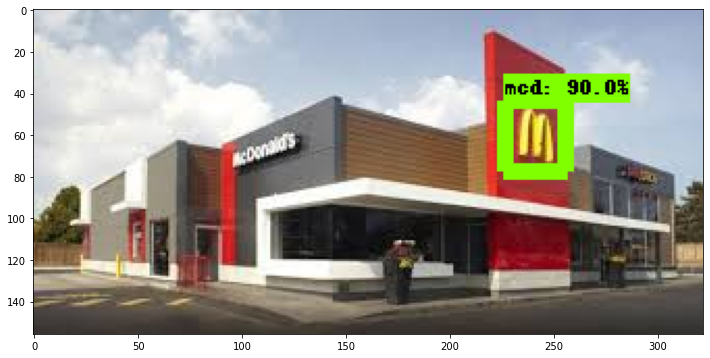

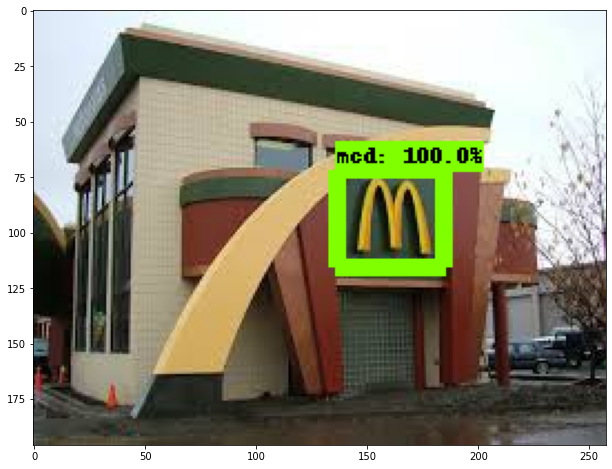

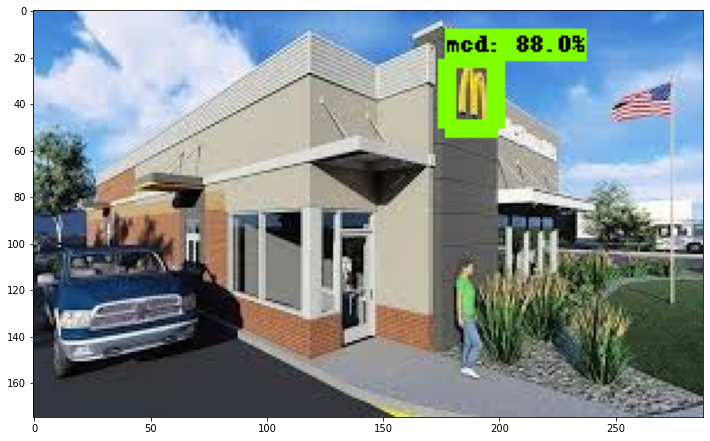

In [36]:
import cv2
%matplotlib inline
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        for image_path in TEST_IMAGE_PATHS:
            image_np = cv2.imread(image_path)
            image_np = cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB)
            # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
            image_np_expanded = np.expand_dims(image_np, axis=0)
            # Extract image tensor
            image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
            # Extract detection boxes
            boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
            # Extract detection scores
            scores = detection_graph.get_tensor_by_name('detection_scores:0')
            # Extract detection classes
            classes = detection_graph.get_tensor_by_name('detection_classes:0')
            # Extract number of detectionsd
            num_detections = detection_graph.get_tensor_by_name(
                'num_detections:0')
            # Actual detection.
            (boxes, scores, classes, num_detections) = sess.run(
                [boxes, scores, classes, num_detections],
                feed_dict={image_tensor: image_np_expanded})
            # Visualization of the results of a detection.
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                line_thickness=8)
            plt.figure(figsize=IMAGE_SIZE)
            plt.imshow(image_np)